In [106]:
import pandas as pd
data = pd.read_excel('高斯混合模型.xlsx')[['*天门冬氨酸氨基转换酶', '尿酸', '年龄', '性别', '甘油三酯', '红细胞体积分布宽度', '红细胞平均体积',
       '红细胞计数', '血小板平均体积', '血红蛋白', '血糖']]

x = data.iloc[:,:-1]
y = data.iloc[:,-1]
import numpy as np

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
from sklearn.metrics import mean_squared_error

#划分训练集与测试集
from sklearn.model_selection import train_test_split

import xgboost

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=228)
model = xgboost.XGBRFRegressor()
model.fit(x_train, y_train)
mean_squared_error(y_test, model.predict(x_test))

1.0512314725700864

In [113]:
from sko.PSO import PSO
import xgboost
def f(params):
    model = xgboost.XGBRegressor(min_child_weight = int(params[0]), eta = params[1], n_estimators = int(params[2]), colsample_bytree = params[3])
    model.fit(x_train, y_train)
    rmse_test = mean_squared_error(y_test, model.predict(x_test)) ** 0.5
    print(rmse_test)
    return rmse_test
    
pso = PSO(func=f, dim = 5, lb = [1, 0, 10, 0, 0.5], ub = [10, 1, 500, 1, 1], pop=10, max_iter=100)
pso_ret = pso.run()

1.240774965621986
1.4050583077477015
1.4194715320715747
1.120514867258344
1.27212536273638
1.0133943741112967
1.1474318815313567
1.1178963328696665
1.0938405711313497
1.3769564340358682
1.0968296280387861
1.301422314845025
1.1852186204886173
1.3807153729867532
5.15864296285948
1.2219198727218141
1.2845233031494068
1.3842792326166813
1.1964252872224597
5.15864296285948
5.15864296285948
1.236309471040272
1.1160839870242527
1.4615189790920107
5.15864296285948
1.208585919709043
1.3054636015590582
1.3372547307093186
1.3628862472651966
5.15864296285948
5.15864296285948
1.1706413864901886
1.1422354170766147
1.2426694899076818
5.15864296285948
1.1571602609795726
1.1997620229615313
1.3539187617141926
1.8729549238401075
5.15864296285948
5.15864296285948
1.0876400466681047
1.0549612813461469
5.15864296285948
5.15864296285948
1.0080732463337265
1.0604916008078322
1.2496060337491908
2.958150396064975
5.15864296285948
5.15864296285948
1.2850491593946485
5.15864296285948
5.15864296285948
2.0209368189

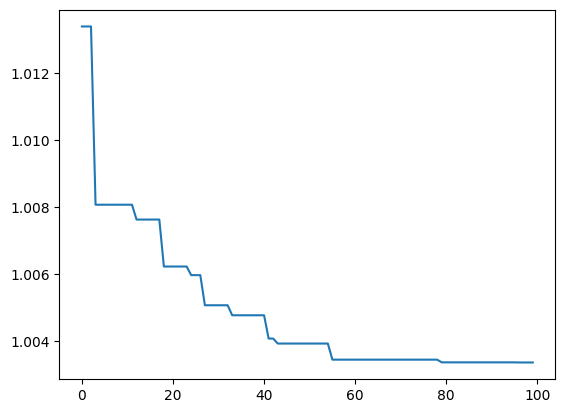

In [114]:
import pylab as plt
plt.plot(pso_ret.gbest_y_hist)

In [115]:
pso.gbest_x

array([1.00000000e+01, 3.03474388e-02, 1.42583261e+02, 5.39996625e-01,
       7.84115511e-01])

In [117]:
from mealpy import SSA
import numpy as np

problem_dict = {
    "fit_func": f,
    "lb": [1, 0, 10, 0, 0.5],
    "ub": [10, 1, 500, 1, 1],
    "minmax": "min",
}

ga_model = SSA.BaseSSA(epoch=100, pop_size=10, pc=0.85, pm=0.1)
best_position, best_fitness_value = ga_model.solve(problem_dict)

print(best_position)
print(best_fitness_value)

2023/05/28 11:55:17 AM, INFO, mealpy.swarm_based.SSA.BaseSSA: Solving single objective optimization problem.


1.2677325798659527
1.0283015354010296
1.2857470086155043
1.0548686073805396
1.3271636879124291
1.4376897921605227
1.3069621953561144
1.3865799405404624
1.379282324993722
1.401095953653869
1.2157632600622403
1.0407889488527893
1.0606631749569517
1.447861341718395
1.4495460443899357
1.383638610225079
1.3180044278606533
5.15864296285948
5.15864296285948
5.15864296285948
5.15864296285948
1.0255444290946825
1.2621930286181897
1.062587439615429
5.15864296285948
1.315144622652992
1.4656123384604243
5.15864296285948
1.4554155264778572


2023/05/28 11:55:52 AM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 1, Current best: 1.0255444290946825, Global best: 1.0255444290946825, Runtime: 22.01710 seconds


1.2431839674353218
1.0251195478322173
1.0333933878551578
1.3258185914473535
1.1506644373405719
1.4156873657814621
1.4630874781880765
5.15864296285948
5.15864296285948
5.15864296285948
5.15864296285948
1.0220150773718522
1.0404959222073407
1.051769284794801
5.15864296285948
1.1814445836247902
1.3645585966230875
5.15864296285948
5.15864296285948


2023/05/28 11:56:11 AM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 2, Current best: 1.0220150773718522, Global best: 1.0220150773718522, Runtime: 19.07980 seconds


1.3856568761298411
1.1435829921488179
1.0318833809616401
1.3341805992725555
1.331281144513884
5.15864296285948
1.459846012108733
5.15864296285948
1.266860088033026
5.15864296285948
5.15864296285948
1.0249738444824923
1.0179719866735355
1.067731597121119
1.1297046121297243
5.15864296285948
1.4657732334271019
1.0993226299592929
1.1676978604078583


2023/05/28 11:56:33 AM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 3, Current best: 1.0179719866735355, Global best: 1.0179719866735355, Runtime: 21.73545 seconds


5.15864296285948
1.458122322590054
5.15864296285948
1.4657732334271019
1.2523455380754875
1.3173362849255383
1.4657732334271019
5.15864296285948
5.15864296285948
5.15864296285948
1.266860088033026
1.0330423227322054
1.0203785776119307
5.15864296285948
5.15864296285948
1.124788868109254
1.1897174856242512
5.15864296285948
1.1944420852433228


2023/05/28 11:56:54 AM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 4, Current best: 1.0179719866735355, Global best: 1.0179719866735355, Runtime: 20.97614 seconds


1.465792096368571
5.15864296285948
5.15864296285948
1.4203817246095511
1.4235071336444158
5.15864296285948
5.15864296285948
1.1457138720453146
5.15864296285948
5.15864296285948
1.266860088033026
1.021384045661912
1.0212121368544387
1.0525031440035224
1.0626085118691393
1.019323446786344
5.15864296285948
1.2406567356210296
1.1393489888053376


2023/05/28 11:57:06 AM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 5, Current best: 1.0179719866735355, Global best: 1.0179719866735355, Runtime: 12.16839 seconds


5.15864296285948
1.028091181502767
1.0238462388551237
1.171036362795118
1.4588690936411186
1.4488908472282158
1.1604693032248257
5.15864296285948
1.266860088033026
5.15864296285948
1.0729346397118584
1.0155394995346174
1.011395354383072
1.018601780305023
1.0511269996483736
5.15864296285948
5.15864296285948
1.0244671267416645
1.092615311373429


2023/05/28 11:57:20 AM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 6, Current best: 1.011395354383072, Global best: 1.011395354383072, Runtime: 13.94060 seconds


5.15864296285948
1.0554221170606155
1.0229133468052503
1.3590695617847892
1.2370256264553188
5.15864296285948
1.4690960692648973
1.0751751240680392
1.266860088033026
1.266860088033026
5.15864296285948
1.0131764597318726
1.0192768527766245
1.0271426919503934
1.0251175764909617
1.050222616006576
1.0583042184475453
1.2009672773048807
1.0817035507485109


2023/05/28 11:57:46 AM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 7, Current best: 1.011395354383072, Global best: 1.011395354383072, Runtime: 25.57249 seconds


1.123043953946102
1.2209617992293658
1.199030449113064
3.0785334326654477
1.0679776944887427
1.143229664554327
1.106984178314648
5.15864296285948
1.266860088033026
5.15864296285948
1.1468670740911293
1.0122172878656774
1.0120050079027352
1.01429874519483
1.010399884867154
1.0187128974084918
1.0500321226974996
1.1958073112299303
5.15864296285948


2023/05/28 11:58:08 AM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 8, Current best: 1.010399884867154, Global best: 1.010399884867154, Runtime: 22.32576 seconds


1.1947345808945895
1.030214806033578
1.0220624781350125
1.0476624686761427
1.30791588991448
1.4279265638909606
1.2584014853995265
5.15864296285948
5.15864296285948
1.266860088033026
1.266860088033026
1.0170555475853529
1.012319952125108
1.01443416895592
1.0119586628463348
1.021239095401595
5.15864296285948
1.2424379284806328
5.15864296285948


2023/05/28 11:58:31 AM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 9, Current best: 1.010399884867154, Global best: 1.010399884867154, Runtime: 22.78292 seconds


1.0675638325856043
1.0213132011318409
1.021715071989705
1.054568523824737
1.08764958327451
1.718249897207835
5.15864296285948
1.2394006615199866
1.2856114114070842
1.0780723024047778
5.15864296285948
1.0153863926960693
1.013358213912763
1.0128869035484256
1.0156569102670867
1.056050204482424
1.0222626197247358
1.05840474545189
5.15864296285948


2023/05/28 11:58:51 AM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 10, Current best: 1.010399884867154, Global best: 1.010399884867154, Runtime: 19.50854 seconds


5.15864296285948
1.0171308982124923
1.0362325277250328
1.1765410570594972
1.0933968568158272
1.1520540463613158
1.083178191592593
5.15864296285948
1.0746008093790766
1.1021970485189483
5.15864296285948
1.017749017015762
1.0111782298145484
1.0128852732609739
1.0115191801860324
4.684463057255909
5.15864296285948
1.0430785927627604
5.15864296285948


2023/05/28 11:59:13 AM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 11, Current best: 1.010399884867154, Global best: 1.010399884867154, Runtime: 22.07143 seconds


1.1263047662337349
1.0205947514582194
1.0468314795967963
1.1769162340910917
1.0272383180957851
1.1218498543520667
1.1171391513637745
5.15864296285948
5.15864296285948
1.266860088033026
1.1142039100240912
1.0133304184320813
1.0115808916491271
1.0131234333564467
1.011773182006561
1.0192472687420218
5.15864296285948
2.8784000411888235
5.15864296285948


2023/05/28 11:59:31 AM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 12, Current best: 1.010399884867154, Global best: 1.010399884867154, Runtime: 18.62080 seconds


1.0368728356215289
1.0238978001560683
1.0230210592416848
1.304567891346961
1.1335410694525494
1.1011715641965238
1.1349440346256332
1.266860088033026
1.266860088033026
5.15864296285948
1.266860088033026
1.0125503600362957
1.0371758187200901
1.0119048574048923
1.0095642753582594
1.012597561302619
1.022391582094972
1.0916485940656895
1.0143159447212624


2023/05/28 11:59:47 AM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 13, Current best: 1.0095642753582594, Global best: 1.0095642753582594, Runtime: 15.88361 seconds


1.042865446626169
1.0367212679585773
1.0405553703264965
1.1080459420232316
1.124610665904201
1.061112185279283
1.0153974774793273
5.15864296285948
5.15864296285948
1.0894852765934913
1.266860088033026
1.0109809931984368
1.0121303995724198
1.011812318729056
1.010439394258513
1.0132418249383248
1.0102100588186234
1.0240161715999792
5.15864296285948


2023/05/28 12:00:07 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 14, Current best: 1.0095642753582594, Global best: 1.0095642753582594, Runtime: 20.28531 seconds


1.013077576591997
1.0333150690369652
1.02430424858983
1.0500610167213331
1.0946082699740838
1.0572576260196138
1.0421849374952838
5.15864296285948
1.8933425028909354
5.15864296285948
1.266860088033026
1.0106895120415833
1.0108958226441205
1.0207237596716894
1.0135661665947513
1.0276146234417887
1.0121085080848977
1.012618497665818
1.0182402611473589


2023/05/28 12:00:28 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 15, Current best: 1.0095642753582594, Global best: 1.0095642753582594, Runtime: 20.45438 seconds


5.15864296285948
1.0209657846495617
1.041581086376761
1.0814665680724387
1.0396407296402659
1.0269015460449384
2.3403361239788563
5.15864296285948
5.15864296285948
5.15864296285948
1.266860088033026
1.0138872800020915
1.011579816774404
1.012835515351272
1.0122183995283474
1.0102804104796939
1.009098112521248
1.0083957496331941
1.0134208540547978


2023/05/28 12:00:49 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 16, Current best: 1.0083957496331941, Global best: 1.0083957496331941, Runtime: 21.28642 seconds


5.15864296285948
1.035501888353737
1.0185339502241104
1.077294990951631
1.0759695868067773
1.0543877257270144
1.0549849130406928
5.15864296285948
5.15864296285948
1.12027230667819
2.2629053654592255
1.0126243801562482
1.012495506839981
1.016222963311666
1.0353133462590927
1.0139045347578604
1.011616946598641
1.0116183793750242
1.014161860320423


2023/05/28 12:01:14 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 17, Current best: 1.0083957496331941, Global best: 1.0083957496331941, Runtime: 24.72599 seconds


1.0351508414060955
1.0160439781486366
1.0315628267840484
1.01325301985697
1.0225050151880375
1.065618512360656
1.0587209961809967
1.173696107809526
1.266860088033026
1.2326558915018284
1.1058754995916733
1.012983521321302
1.011718600486448
1.0139805383723381
1.0126158041144397
1.0114523655387249
1.0119735296867918
1.0115726663150344
1.0093394313108268


2023/05/28 12:01:32 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 18, Current best: 1.0083957496331941, Global best: 1.0083957496331941, Runtime: 18.36630 seconds


1.0224468824779673
1.0375502984495986
1.0208831419976154
1.019807844508427
1.0582547431557432
1.0201512822453356
1.0179594510808274
1.4678166071464838
5.15864296285948
1.3035797440504284
1.266860088033026
1.010639125374744
1.0161832578326946
1.0141864992786827
1.0134724825012744
1.0368496682826924
1.011343644597208
1.0109129002624957
1.0096628823216824


2023/05/28 12:01:52 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 19, Current best: 1.0083957496331941, Global best: 1.0083957496331941, Runtime: 19.94673 seconds


5.15864296285948
1.041740904603158
1.4619975006567851
1.014780088636526
1.0259149287568747
1.0267509406914936
1.0230653325532182
3.191381538179025
1.0927865097248235
5.15864296285948
5.15864296285948
1.0153986736815759
1.0154963838990116
1.0093765096196075
1.011074749328958
1.0142252957824278
1.0141559368573425
1.0111207208884858
1.011482508724947


2023/05/28 12:02:12 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 20, Current best: 1.0083957496331941, Global best: 1.0083957496331941, Runtime: 20.14018 seconds


5.15864296285948
5.15864296285948
1.3056960163695708
1.0344679976712507
1.012769810509064
1.3091354142119482
1.023797651769777
1.0798392234667509
5.015541406750828
1.1719247659120962
1.1071891300236238
1.0120902008502803
1.0102274759556822
1.011455518023933
1.0116184593285793
1.0125706974905728
1.0138413472570114
1.0130362693713564
1.0097158794305048


2023/05/28 12:02:30 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 21, Current best: 1.0083957496331941, Global best: 1.0083957496331941, Runtime: 17.55498 seconds


1.2536481329675497
3.9380193112782007
1.4619975006567851
1.0144869898001785
1.0155376126733426
1.153987098695178
1.022794683022216
5.15864296285948
1.266860088033026
1.200547851729425
5.15864296285948
1.0091956295047912
1.013859623292151
1.0146409186178584
1.013295173172404
1.0111088571425475
1.0216717046705106
1.0118550656648515
1.0132248787602973


2023/05/28 12:02:47 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 22, Current best: 1.0083957496331941, Global best: 1.0083957496331941, Runtime: 17.40434 seconds


1.0218621207006047
1.1018762355278062
5.15864296285948
1.0141209653981957
1.0142217228220827
1.0311358183031438
1.016048660978054
5.15864296285948
1.0844158570254157
5.15864296285948
5.15864296285948
1.0107303208219343
1.010235536163323
1.009095146170572
1.0118833557162967
1.0133267955659644
1.0141734118664762
1.0205319601104565
1.0104849798344335


2023/05/28 12:03:04 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 23, Current best: 1.0083957496331941, Global best: 1.0083957496331941, Runtime: 16.43370 seconds


1.0307093472442133
1.0348702230876918
1.0534505494987314
1.0138154858127737
1.0175997280901847
1.014462765634609
1.0278886466420052
5.15864296285948
5.15864296285948
5.15864296285948
1.0897788156373396
1.0091658013907736
1.0121201013743066
1.0096083850622604
1.0094275447136662
1.0093867649807575
1.0103705221143944
1.027012334858309
1.011509381499089


2023/05/28 12:03:23 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 24, Current best: 1.0083957496331941, Global best: 1.0083957496331941, Runtime: 19.17966 seconds


1.0771493276126831
1.461925346701555
5.15864296285948
1.032658816453383
1.0213855448424405
1.0240346339973723
1.0152314828134263
1.1569188639256938
1.266860088033026
5.15864296285948
1.2809719506474508
1.012304576108792
1.0134583892150137
1.0112903300621379
1.0093826416785456
1.0128314836938204
1.0114070978141136
1.009597350276993
1.0128261761510764


2023/05/28 12:03:39 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 25, Current best: 1.0083957496331941, Global best: 1.0083957496331941, Runtime: 16.42893 seconds


2.494785716072135
1.0384511445017128
1.0480312545005996
1.021707123087099
1.0207520938479666
1.018042409749604
1.0150912174484605
5.15864296285948
5.15864296285948
5.15864296285948
5.15864296285948
1.0120567219345091
1.0132587285427297
1.0119046599196952
1.0083950637458376
1.0121152272582377
1.0132785041486256
1.0242618486749235
1.0113244594004072


2023/05/28 12:06:12 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 26, Current best: 1.0083950637458376, Global best: 1.0083950637458376, Runtime: 152.86491 seconds


1.2628029114703965
1.0357766667427901
1.0396252202663705
1.0174623386749793
1.0143489542769053
1.0166660804967758
1.011337831849234
3.184722229772915
1.266860088033026
5.15864296285948
1.266860088033026
1.0083944973397796
1.0105479733599343
1.01282827237474
1.014973900194756
1.0132632825490555
1.017261352466575
1.0131542306443888
1.0138513110845957


2023/05/28 12:06:38 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 27, Current best: 1.0083944973397796, Global best: 1.0083944973397796, Runtime: 25.52572 seconds


1.6897524135449278
5.15864296285948
5.15864296285948
1.0123798690451016
1.013423900596336
1.0231547476936993
1.0295348273138745
1.266860088033026
5.15864296285948
5.15864296285948
1.266860088033026
1.0132615884648937
1.0095164870179356
1.0074306576015748
1.0102048610004255
1.010850500533237
1.0181814625308947
1.0095304325033074
1.0105674883117315


2023/05/28 12:06:56 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 28, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 18.15218 seconds


1.0239908021602848
1.1791906052662653
1.0317765455397254
1.0170792212671678
1.0161726314496322
1.012281266463381
1.0138545780863446
1.2852136565903005
5.15864296285948
1.103959326041961
5.15864296285948
1.0084419473056914
1.0128204829917913
1.0141286765873914
1.0117806563031133
1.0128199867519547
1.009993183886355
1.013759028920564
1.0097527282002234


2023/05/28 12:07:16 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 29, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 20.38729 seconds


1.0101196351603416
1.0273525206323806
1.033303520836222
1.0100277358866037
1.0120771879474042
1.0127805413297308
1.0184044198204476
1.1039320109138133
5.15864296285948
5.15864296285948
1.3529825927317025
1.0137398578968915
1.0081673884867948
1.0102143205603984
1.018573046824343
1.0083774977283018
1.0244425871721812
1.0130085650923388
1.0107732939344491


2023/05/28 12:07:36 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 30, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 19.91382 seconds


1.0114111565364274
1.0385394756541961
1.0602125204197754
1.0130767723465472
1.0233214194302593
1.0104353830144048
1.0077578106090412
1.120137773095093
1.2094452534106752
1.0815697048425534
5.15864296285948
1.0142472123804838
1.0134557391191867
1.0083407597908325
1.0081712582642741
1.01262072478269
1.0127089681197314
1.0115931973096342
1.0122528862383078


2023/05/28 12:07:57 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 31, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 20.65003 seconds


1.1259898031761926
1.0513624431219102
1.0408578252609806
1.0144105036858484
1.0113768523630466
1.0134992243214267
1.014026688994156
1.0783235589819944
5.15864296285948
5.15864296285948
5.15864296285948
1.01480386046697
1.0128299721707281
1.011594062102894
1.013806036565929
1.0121091635326263
1.010351968226919
1.0115847166577594
1.0107509679168212


2023/05/28 12:08:19 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 32, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 22.49659 seconds


1.835486608268733
1.0318802771544382
1.0610998325518928
1.0202132268041226
1.014933152164288
1.0155993001163208
1.012137053262325
5.15864296285948
5.15864296285948
5.15864296285948
1.266860088033026
1.0124268298207948
1.008706825153341
1.0132639512299122
1.0083696314646187
1.010212996503217
1.0127117890737776
1.0118351117010342
1.0104695865515774


2023/05/28 12:08:39 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 33, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 19.69655 seconds


1.0138598676408868
1.05971944552859
1.049689894315384
1.0129148773956442
1.0146274088990492
1.011694389776344
1.0215464423016418
5.15864296285948
3.357213055802039
1.0746397296876813
5.15864296285948
1.0101754074006675
1.0128287487798207
1.0130934044904232
1.0128256216674085
1.0099769232860798
1.0125654516963705
1.0113175205835
1.0098417213444344


2023/05/28 12:08:59 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 34, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 20.13497 seconds


1.0333363078303264
1.2950767035698805
5.15864296285948
1.0110545070095442
1.0122153924091133
1.0144414705408866
1.016812645101306
5.15864296285948
5.15864296285948
1.307261462828027
4.280754662443451
1.0121377013704989
1.0128313205555164
1.0128165977854997
1.0083405403972472
1.0126236586532555
1.012858860384346
1.0142275371418121
1.0122409831818648


2023/05/28 12:09:17 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 35, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 17.60496 seconds


1.0163114513845524
5.15864296285948
1.188214378371586
1.0139169942023962
1.0178063241756208
1.0114250424962663
1.020546614736428
5.15864296285948
1.2147915020585134
1.266860088033026
5.15864296285948
1.0101091223569594
1.0128268661606994
1.0137380146417625
1.009387254237324
1.0122514129732247
1.0086807505469337
1.0125052780703707
1.0148827522008876


2023/05/28 12:11:07 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 36, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 110.56226 seconds


1.0092406314559064
1.3771987631000706
1.048003315603997
1.0132837111382957
1.012539202849904
1.0098604183834912
1.0083308513116596
5.15864296285948
1.266860088033026
5.15864296285948
1.266860088033026
1.0100941086823345
1.0133267955659644
1.0128256436272263
1.0114455535541091
1.0128289474116587
1.0119671151695848
1.010160790430028
1.0141014142866502


2023/05/28 12:11:30 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 37, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 22.84578 seconds


1.0121184186299166
1.051927239043458
1.0462151578865113
1.0106220449584593
1.0121203856055174
1.0132244160320112
1.0108433289550292
1.266860088033026
1.3528549062180262
5.15864296285948
1.3207372313049912
1.0140268412585993
1.0083729969573978
1.0137375982690928
1.0104956197676354
1.0128286553767998
1.013165513752381
1.035968471324585
1.0125897503958672


2023/05/28 12:11:53 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 38, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 23.10564 seconds


1.0101766100986216
5.15864296285948
1.4621448627631175
1.0122741062493859
1.0112988315579017
1.0111999656336699
1.0116241142813112
1.266860088033026
1.266860088033026
1.2315899420752885
1.266860088033026
1.0329803239097026
1.013075491110362
1.013736712466883
1.0133616385008308
1.0128280391024993
1.011818882695158
1.007779395477675
1.0169405450982898


2023/05/28 12:12:11 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 39, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 18.01926 seconds


1.0134157619352215
1.0354957431191332
1.0371933549265868
1.0101773116721853
1.0114637849498247
1.0110774970316916
1.0116824455930264
5.15864296285948
1.1283090343935658
1.080526435332012
1.266860088033026
1.014493919458189
1.0117998949482874
1.0128294763435373
1.0083741734799696
1.0150635444437432
1.007430715463893
1.010490090350366
1.0110528126365175


2023/05/28 12:12:21 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 40, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 9.65846 seconds


1.0118847529101052
1.0512324683997347
1.0861630688958699
1.0090048339368292
1.0146012174044585
1.0116289271576662
1.0109063314037243
3.4665345629209994
5.15864296285948
5.15864296285948
1.071804932166171
1.007560826544534
1.0319772780900873
1.0104822908917146
1.01266109636355
1.0101504336570792
1.012611359217364
1.0097299795334282
1.0122486223989917


2023/05/28 12:12:29 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 41, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 8.23367 seconds


1.0078920243776834
1.0277819680471725
1.0401381774568232
1.0163257881920658
1.0121443819259943
1.0119077374906391
1.0101308401793867
1.1639308132406303
1.266860088033026
1.266860088033026
5.15864296285948
1.0128248277194136
1.0123191996837424
1.0118736436595586
1.013071676249729
1.0132243481712497
1.0101943050727116
1.0138396850225808
1.013014683157574


2023/05/28 12:12:36 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 42, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 7.10789 seconds


1.0130284052644736
1.0376576438819107
1.0346537115738696
1.0108200417917157
1.0145943592895184
1.0106911207219578
1.0123386405455104
5.15864296285948
5.15864296285948
1.08997120509423
1.266860088033026
1.0075608727468663
1.0518356478242854
1.01421651669927
1.0112048494886894
1.0137386931871086
1.0128252728841494
1.0119640794630087
1.0126256540684093


2023/05/28 12:12:44 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 43, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 7.54755 seconds


1.0114894309097224
1.0567290819378445
1.0607832439323026
1.0118234488716022
1.0141140236507655
1.0151518078102921
1.0134669529202411
5.15864296285948
5.15864296285948
5.15864296285948
5.15864296285948
1.0111089265074762
1.009920265055648
1.0139768051709335
1.0114824451186628
1.0128242695433671
1.0137382893080922
1.0122768209681627
1.011516048300541


2023/05/28 12:12:51 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 44, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 7.04164 seconds


1.0109909978503904
1.031353052458707
5.15864296285948
1.01509953465914
1.012428080810071
1.0104998087201364
1.0118611449243484
1.266860088033026
5.15864296285948
1.1913239568724843
5.15864296285948
1.0128248259519388
1.013577024914987
1.01222267234918
1.0134300318416434
1.0087419173320156
1.0107540716215553
1.011003071092124
1.0115831949476946


2023/05/28 12:12:58 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 45, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 6.78649 seconds


1.0133866172467723
1.0329800558339692
1.050386749029143
1.0133265910085079
1.0114308299049986
1.009074299638365
1.0100964565807307
1.266860088033026
5.15864296285948
5.15864296285948
5.15864296285948
1.0128248067355896
1.0165796808018879
1.0095473909975694
1.0107213324891187
1.0137379051538
1.0129446590118698
1.0112599393554809
1.0130091702024226


2023/05/28 12:13:05 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 46, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 7.25784 seconds


1.0166921883713858
1.0544731688390039
1.0379922429190422
1.0133957193133398
1.0109424841804333
1.01187821505836
1.0102876402151155
1.157659165038081
5.15864296285948
5.15864296285948
5.15864296285948
1.0126535877364327
1.0103902733644305
1.013176539822701
1.014014702356229
1.00837116220487
1.0104571067780441
1.0117999297563445
1.0088472744365897


2023/05/28 12:13:13 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 47, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 7.84555 seconds


1.0137962665472084
1.0571226916625425
1.062241811587793
1.0113748887511105
1.0089681025238018
1.0114938161135867
1.0106866416496172
5.15864296285948
1.0726828203381702
5.15864296285948
5.15864296285948
1.0111088964928692
1.0143501255935417
1.0122828086215852
1.0132580247416636
1.0138063768071714
1.0138053373256473
1.0134799480114616
1.011225247495179


2023/05/28 12:13:20 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 48, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 7.53231 seconds


1.0138110118107828
1.0650677232889745
1.0539809023492086
1.013128794578455
1.0126735566153549
1.0079237363293885
1.010300014910775
5.15864296285948
5.15864296285948
5.15864296285948
5.15864296285948
1.011108900546373
1.0268899830636251
1.0137791047697222
1.0121130079265734
1.008170777573387
1.01261982626559
1.0110604151559919
1.01460697267432


2023/05/28 12:13:28 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 49, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 7.46683 seconds


1.0103415819397952
1.0556397127921082
1.1304958386076365
1.0116414584362885
1.008573913771115
1.0143318172320352
1.0142917520356618
1.107418276709057
1.32481994295119
5.15864296285948
5.15864296285948
1.0075608129382427
1.013427030229683
1.0099572214252428
1.0121152753143492
1.0087413481765655
1.0137371102112076
1.0122486263994543
1.0137308830935785


2023/05/28 12:13:36 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 50, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 8.24193 seconds


1.013249279403887
1.2275187663855978
5.15864296285948
1.0139200863711255
1.0097659717159382
1.008976961174731
1.0099201146130787
5.15864296285948
5.15864296285948
1.1234091256943193
5.15864296285948
1.0128249481181268
1.0121749964921263
1.0148159370336096
1.0116990919693483
1.0075574936330673
1.0083781949296517
1.0104353601431668
1.010113668604931


2023/05/28 12:13:42 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 51, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 6.35028 seconds


1.0122795194406544
1.458122322590054
1.458122322590054
1.0127064054825852
1.0106364795071785
1.014439253698686
1.0109547169355235
1.266860088033026
1.1195486890043758
1.266860088033026
1.2495443896164546
1.0075608817249524
1.0083784901256712
1.0161157189222225
1.0140323904080373
1.0095456410686912
1.008397992919797
1.0175348356208271
1.0126177326887469


2023/05/28 12:13:51 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 52, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 8.73786 seconds


1.0132225433282838
5.15864296285948
5.15864296285948
1.009338320778114
1.0131211100334465
1.0089834902424248
1.0131577610729676
1.266860088033026
1.2266967041257584
1.1566950243800946
5.15864296285948
1.013222247030076
1.0128267940419498
1.010223925658585
1.0117687282957457
1.0128318690933442
1.0132650060338784
1.0122009865159889
1.012115278828804


2023/05/28 12:13:59 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 53, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 7.32547 seconds


1.0114938227704726
1.0462659359398117
1.3749817572472152
1.012504968135579
1.0119993973832047
1.0127961723063799
1.016166600583513
5.15864296285948
5.15864296285948
5.15864296285948
5.15864296285948
1.0074307310925137
1.0107149566063856
1.0185021992071455
1.0116934509397146
1.0135938834892457
1.0132651476280568
1.0117014904304096
1.0125280930150264


2023/05/28 12:14:07 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 54, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 8.91032 seconds


1.0106645672100005
1.1457275956063053
1.0736644428741482
1.0095949354706981
1.0141069071389108
1.0085151272890045
1.0090911870895651
5.15864296285948
5.15864296285948
5.15864296285948
5.15864296285948
1.0075593815921877
1.0124553398135838
1.0138230551590035
1.0101785947496635
1.0083677497150925
1.013793452303937
1.0132139823160073
1.0124555493980865


2023/05/28 12:14:15 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 55, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 7.47415 seconds


1.0102967717891547
1.1211115057579644
1.0589638478221854
1.0127802860199682
1.0114861428149429
1.008574429337372
1.0116785267703936
5.15864296285948
5.15864296285948
1.2132210971801711
5.15864296285948
1.0128248187358568
1.0084957483315624
1.0131726679430655
1.0167202640583568
1.0122280076513228
1.0084735356725307
1.0129681080045299
1.01271719908715


2023/05/28 12:14:27 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 56, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 12.05811 seconds


1.0125078552826619
1.0612688549822145
1.0739863360379365
1.0114708860058326
1.0097767783254759
1.0132259148215268
1.011880670606362
5.15864296285948
5.15864296285948
5.15864296285948
5.15864296285948
1.0138052195544331
1.0115945273873042
1.0105881157011272
1.0162626935788732
1.0117484359036346
1.0121926451509933
1.011726321173743
1.0102375856443442


2023/05/28 12:14:38 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 57, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 11.40965 seconds


1.0125930100930478
1.0512354221365394
1.0826086443382898
1.0115138654509586
1.0102401181895995
1.007824816797125
1.0095376894579242
5.15864296285948
5.15864296285948
1.266860088033026
5.15864296285948
1.0111089452070567
1.0128249061709318
1.0108672274001917
1.0116915630667935
1.0081672559035515
1.0121190085822933
1.012353002283375
1.0116183195877373


2023/05/28 12:14:50 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 58, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 11.68906 seconds


1.0179734476115831
1.2675829650829213
1.051978103172236
1.0124681979631829
1.007858067610576
1.0095305505858536
1.0125276404127068
5.15864296285948
5.15864296285948
1.0729494561747492
5.15864296285948
1.0128248187358568
1.0106416562329334
1.0079794629374659
1.015878799456838
1.0108235232276586
1.0087436056264085
1.0115550682878067
1.0124248899666415


2023/05/28 12:15:01 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 59, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 11.40998 seconds


1.012687792221376
1.053999864631225
1.0465886592266658
1.0110241149618509
1.0142332663787017
1.0090017917128946
1.0113977682009565
5.15864296285948
1.266860088033026
1.266860088033026
1.266860088033026
1.0128248219822429
1.012827406884206
1.011399403161763
1.013329760764526
1.0121118302055792
1.0083785426954404
1.012779916708117
1.01047233275408


2023/05/28 12:15:13 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 60, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 11.14955 seconds


1.0114996959772928
1.1372840513621485
1.044499512523972
1.0105684302666365
1.013743197683135
1.0087097861614651
1.0104081848582853
1.266860088033026
1.795289728806879
5.15864296285948
4.535813296011156
1.0128249146517343
1.0132244681369877
1.0102222943254155
1.013811380359466
1.0115912814194423
1.0106419428392655
1.011564494458862
1.0122279544808248


2023/05/28 12:15:21 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 61, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 8.55842 seconds


1.0149728073717657
1.053655160935813
1.0734624632533778
1.0158515677119295
1.0099930996451723
1.011521023094698
1.0119984457470088
1.1741187753383464
1.266860088033026
1.6518715659396725
1.1127031694664578
1.011108900546373
1.01322176860473
1.0130154773886866
1.0093025020643884
1.0094110587349177
1.0128287513385308
1.012105211634792
1.0106261306953892


2023/05/28 12:15:28 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 62, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 7.18950 seconds


1.0102715427868991
1.0545083509882471
1.0528025212526244
1.009660840241318
1.011576286556583
1.0113839303263332
1.0109004634530356
1.266860088033026
1.075605039893647
1.1842044828912996
1.1403871624128008
1.0075608007602586
1.0128273269188595
1.0361253968179094
1.0124778574849775
1.0115930948397536
1.0128197805089922
1.009977550245165
1.0120327133462974


2023/05/28 12:15:37 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 63, Current best: 1.0074306576015748, Global best: 1.0074306576015748, Runtime: 8.33882 seconds


1.0195535985174142
1.0410819078312585
1.0572384530999337
1.0068116553198907
1.0104430941185019
1.014641115490751
1.0106900412975026
5.15864296285948
5.15864296285948
1.266860088033026
5.15864296285948
1.0086356601822606
1.010460058004144
1.0172841544008457
1.014773964503092
1.0137687527042667
1.0145994522425348
1.0115369116160122
1.0122802362612455


2023/05/28 12:15:45 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 64, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.81743 seconds


1.0086801944633603
1.0621391748819158
1.0686720852403448
1.0105529001626326
1.0112799442010727
1.0121681107081106
1.0114338311500057
5.15864296285948
1.266860088033026
5.15864296285948
1.266860088033026
1.0137639590549168
1.0130084627519782
1.010347718243568
1.0089225981835896
1.0129247843139968
1.01537498070375
1.0137906587976784
1.0128558629002928


2023/05/28 12:15:52 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 65, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.32946 seconds


1.0138467003655511
1.0434550525864525
1.0585777738492457
1.0119701353838078
1.0102251422010684
1.0126140795565362
1.0096519627989933
1.266860088033026
5.15864296285948
5.15864296285948
5.15864296285948
1.0140794588639688
1.0099767567942526
1.0095052163871001
1.013893572855922
1.0116932294166374
1.0123334676432596
1.0156121287916045
1.01145179191277


2023/05/28 12:16:00 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 66, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.91625 seconds


1.0125033218992876
1.201927202964516
5.15864296285948
1.0115473607272605
1.0128374866347567
1.0148270461263678
1.011286716429197
1.1395090028645232
5.15864296285948
1.1859698556694207
5.15864296285948
1.014814857769202
1.014015010426201
1.0117103968925192
1.0119824668272697
1.0130601268645034
1.0073171100853764
1.013778652396602
1.009605653435694


2023/05/28 12:16:07 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 67, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.52606 seconds


1.0102203989586098
5.15864296285948
5.15864296285948
1.0106644834982481
1.0144796148831783
1.07197766953938
1.0093485106296352
1.2832826447609604
1.266860088033026
5.15864296285948
1.1026940166716845
1.0103413156190113
1.0086980770542036
1.013179077187577
1.0146832385519335
1.0136947625174493
1.0115618057300606
1.0099998401217123
1.0102975644166299


2023/05/28 12:16:14 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 68, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.03661 seconds


1.0120046526359192
1.0854303823555267
1.050508705142582
1.0116156273014403
1.0113203554461165
1.011907128537912
1.0142422413504324
5.15864296285948
4.753250003662893
1.1002278089352524
5.15864296285948
1.0109915802116656
1.0111853731475202
1.0125052582316754
1.0118461381426447
1.0114359670377426
1.0124391557496637
1.015612134468049
1.0121840622867693


2023/05/28 12:16:22 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 69, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.54945 seconds


1.0109294512611953
1.0564786781374602
1.049285865528369
1.0133405675145566
1.0111662018052847
1.011526192191593
1.0129208519593458
5.15864296285948
5.15864296285948
5.15864296285948
1.0809067904991871
1.012025838701004
1.0131617930861774
1.0113030165263055
1.0189097454921785
1.0103966342030648
1.0102233550871365
1.0090341408489936
1.0099102382883711


2023/05/28 12:16:30 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 70, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.61801 seconds


1.0126667203434065
1.0924875332642088
1.1334679500478744
1.0102399342250064
1.0101545775648835
1.026797175532024
1.0126252190299985
1.2870241951492687
1.7144563512645237
1.1886431814400225
2.08948405816428
1.0109996370379113
1.013679984558552
1.008982430764333
1.0180965552586179
1.0103493260660141
1.0126826336415609
1.0121124566105022
1.0086799851339585


2023/05/28 12:16:37 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 71, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.61033 seconds


1.012673715021102
1.458258793845072
1.458122322590054
1.0098514883744714
1.0131252191907583
1.0075687981928996
1.011889164092311
5.15864296285948
1.1514108328494
1.0879306390219041
5.15864296285948
1.0087042013739207
1.011847732958012
1.011753807683396
1.0123432767823786
1.0103487367090276
1.0117988573722094
1.0138264376036
1.0114001660226681


2023/05/28 12:16:44 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 72, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.12715 seconds


1.012518659694823
1.094635010400521
1.0994373563758428
1.0122067237521053
1.0122225294058669
1.0102087825105366
1.0099425523221954
1.240723946364638
5.15864296285948
5.15864296285948
5.15864296285948
1.0115791089107624
1.0123492570006936
1.0159041552745172
1.010762847684094
1.012691748676514
1.0107696475057835
1.0089829394351024
1.0086652361931232


2023/05/28 12:16:52 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 73, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.64349 seconds


1.011607339927524
1.1604606490394556
1.2061304224355234
1.0110862379040544
1.01307257439436
1.0134212652012922
1.010989099914607
1.266860088033026
1.266860088033026
5.15864296285948
5.15864296285948
1.013813939517827
1.0104616049355915
1.0116017247744347
1.0103531021588463
1.0093511337026215
1.0114297591983954
1.0093638401716656
1.0126684608045928


2023/05/28 12:17:00 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 74, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 8.27925 seconds


1.0112785680665093
1.1848879233868033
1.0570201490456708
1.0121139511687929
1.0117093136841577
1.0122510421806938
1.0105347215849168
4.316474668900001
2.3939788090162732
5.15864296285948
5.15864296285948
1.0097462388824743
1.0084817398203125
1.0146943478992134
1.0126388213235031
1.0140902760285617
1.009870635262764
1.0127386770896234
1.0127503294260525


2023/05/28 12:17:08 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 75, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.87442 seconds


1.0098739714185023
1.1571310111383621
1.0560637793031404
1.0133101878128485
1.010469783410119
1.011513477615213
1.0179063724642121
1.266860088033026
1.1009885086156628
5.15864296285948
1.0750525499943824
1.011396894114119
1.010847679191175
1.0131639418182559
1.0113700529094845
1.008312062491649
1.009812573692414
1.0106304972897138
1.0084687254406395


2023/05/28 12:17:17 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 76, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 8.55353 seconds


1.011022584120778
1.342232124819619
1.2331526462118119
1.0103729746684236
1.0104846774499214
1.0176387680284533
1.0128258855691303
1.2497681124345572
5.15864296285948
5.15864296285948
1.2896579622222522
1.0107585182808112
1.0160103956739108
1.0134249841769871
1.0127060386068516
1.015373570533993
1.011412269018865
1.0129690181733937
1.0084685182365247


2023/05/28 12:17:24 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 77, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.74706 seconds


1.0127537621077514
1.0798863187430585
1.1448709740399012
1.0100870935310413
1.012334881621056
1.0107993480143955
1.011001921294484
5.15864296285948
1.2785484818857453
1.5948811165964871
1.266860088033026
1.0114541251700648
1.0127929006784129
1.010090123908442
1.015818881079473
1.0111003168118076
1.0113334936725678
1.0116934371609254
1.012118061712798


2023/05/28 12:17:33 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 78, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 8.57540 seconds


1.0157355279063267
1.458122322590054
1.1812775336693553
1.008723570925744
1.0116055030228894
1.0104819111142294
1.011448152569762
5.15864296285948
5.15864296285948
1.2809719506474508
5.15864296285948
1.0093258280700512
1.011057400530696
1.0113886439928155
1.0150057923502143
1.0134656019533397
1.0129308458008754
1.011120116918246
1.0121180843317037


2023/05/28 12:17:40 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 79, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.32457 seconds


1.0158818523282436
1.0313084951320266
1.0654975023303843
1.0132777134047561
1.0123295087540327
1.011107205726773
1.0135805078005098
1.266860088033026
5.15864296285948
1.266860088033026
1.1365672004928735
1.0132407036587758
1.0196640430988253
1.0122949416339058
1.0126683125711942
1.008921856801319
1.0103993836384169
1.0115865755711533
1.0121180890839687


2023/05/28 12:17:48 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 80, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.96529 seconds


1.0129247817558458
4.517205675426929
1.199840621783622
1.0101135943769481
1.0108979195637493
1.0125871329163665
1.0138809401783944
5.15864296285948
1.1707011328766332
5.15864296285948
1.9056492184827614
1.0080567548689428
1.0115366772903305
1.01235330145642
1.012280870856709
1.0099205021417563
1.0109359622819907
1.0117693343269205
1.0084680894437508


2023/05/28 12:17:55 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 81, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 6.71817 seconds


1.0144328892769814
1.1856024374102712
1.0526845049473101
1.010800275601723
1.0100571184112124
1.0194031805073274
1.0087100273409983
1.266860088033026
5.15864296285948
1.5294238968219105
5.15864296285948
1.013549031343094
1.0131698108956941
1.0107946828111527
1.0107135037990513
1.013343327470542
1.012808275109226
1.0099886923101742
1.0068116553198907


2023/05/28 12:18:03 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 82, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 8.48918 seconds


1.012152518956793
1.0479156685760929
1.0601561859074662
1.0121043327883001
1.011499905987359
1.013737451758734
1.0176476168055462
5.15864296285948
5.15864296285948
1.1495494039447263
1.266860088033026
1.0116298397189976
1.011704114237305
1.0126174057967297
1.0120459368408354
1.014728395788992
1.0095975130225525
1.0085012296973117
1.0113343254755387


2023/05/28 12:18:11 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 83, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 8.00920 seconds


1.011305251013178
5.15864296285948
1.2440608880110542
1.011737267353705
1.0149209005101612
1.0104899373894514
1.011527214478567
5.15864296285948
5.15864296285948
5.15864296285948
1.266860088033026
1.0068116910594362
1.0078248049947218
1.0132120009302354
1.0099112596228053
1.0106315530453058
1.0137865410593154
1.0132033535707108
1.0146430835763367


2023/05/28 12:18:18 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 84, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 6.62234 seconds


1.0121185245416293
1.0573944923663834
1.3509134259260633
1.0145249488284922
1.0099209775472475
1.0140815388326319
1.013055199162939
1.2826346270500983
1.266860088033026
1.1076784611877772
1.1342869644643572
1.0068116553198907
1.0116073237086185
1.0132963410754454
1.0124873210411784
1.0107095060143685
1.01129734016814
1.010761498878843
1.0138115180528577


2023/05/28 12:18:26 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 85, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.73692 seconds


1.0118836010014827
1.0553166280409765
1.4657732334271019
1.0132600948904846
1.0104257375497503
1.0110315142014408
1.0150673003946822
5.15864296285948
1.10446056764469
5.15864296285948
1.3670470843346907
1.0068116553198907
1.01004188965317
1.0109588966815772
1.0105697245966712
1.0116088901955442
1.0111172000978383
1.0110619249333983
1.01317264483894


2023/05/28 12:18:34 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 86, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 8.36821 seconds


1.0106391125557388
1.0592061922840963
1.0628028300102808
1.0099409580947702
1.0095273518055792
1.0116533951026534
1.0086739572772498
5.15864296285948
5.15864296285948
5.15864296285948
1.2809719506474508
1.0068116553198907
1.0123133798232196
1.0132803488306052
1.0137736766092829
1.0137523201879506
1.0105171620408004
1.012156965725505
1.009585271429956


2023/05/28 12:18:43 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 87, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 8.73429 seconds


1.0088369608307866
1.0888186108387907
1.0532073566737365
1.0139776942142018
1.0113991640559785
1.00780011826479
1.0122491472791288
1.266860088033026
1.253354691690295
1.0783180451889423
1.266860088033026
1.0068116553198907
1.0140104508573833
1.0127231540250925
1.0085140339169356
1.011562437707236
1.008575796634352
1.012802552743557
1.008697374809512


2023/05/28 12:18:51 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 88, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.97904 seconds


1.0153736803432463
1.0886008717756157
1.1565594488185365
1.012626325926598
1.0132237971745397
1.0135252143925597
1.008697110868782
1.1144660409114082
1.266860088033026
3.3208568224145267
1.266860088033026
1.0068116553198907
1.0132867951910998
1.011312032412232
1.0120212228501608
1.0138746319667917
1.0076068661376538
1.0107370526568675
1.0092639876383522


2023/05/28 12:18:59 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 89, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 8.23247 seconds


1.0160129210884332
1.6787445702381154
1.0463048071108298
1.011398523655828
1.0130330303698554
1.0108240748750827
1.0129050663181924
1.0751270562726427
1.11694539975831
1.266860088033026
5.15864296285948
1.0068116910594362
1.012987045567172
1.0105012048954947
1.010297796578909
1.0133107888215507
1.0084686818405115
1.0122838810181456
1.0091129139934147


2023/05/28 12:19:07 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 90, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.49090 seconds


1.0124914260469624
5.15864296285948
1.207357576368176
1.0146337019899496
1.0106464836501714
1.0112791437688424
1.015146351424645
5.15864296285948
5.15864296285948
1.22923786104866
5.15864296285948
1.0068116553198907
1.0117667112765052
1.0104435948217758
1.0129957455102034
1.0098625147080373
1.0113837503960499
1.0138209670659664
1.010645470560013


2023/05/28 12:19:13 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 91, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 6.84470 seconds


1.0127962523020597
5.15864296285948
5.15864296285948
1.0117845142363482
1.0092226796481814
1.0113023184996222
1.0112967909616268
5.15864296285948
1.1006970559953762
1.266860088033026
1.266860088033026
1.0068116553198907
1.0089758595227651
1.0146997352441864
1.0144831003183874
1.0093358963453796
1.0143484142467611
1.0095991615054212
1.012586932982321


2023/05/28 12:19:20 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 92, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 6.89919 seconds


1.0135464690928497
1.0798299345114828
1.0780444346593543
1.012616457700902
1.0108725699760235
1.0112289471411224
1.012382729326126
5.15864296285948
1.225052720503586
1.1463923281358295
5.15864296285948
1.0068116553198907
1.0100964445110487
1.0136782725588338
1.0102015251109926
1.0116954653162333
1.0090825710143045
1.0126729713634877
1.0126082370275122


2023/05/28 12:19:29 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 93, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 8.23262 seconds


1.0112799442010727
1.0552814529306216
1.1230029419398064
1.0105327170582845
1.0101941039201976
1.0129556473494332
1.0115013845145744
1.2869050992643196
1.266860088033026
1.1765464135625592
5.15864296285948
1.0068116553198907
1.0097354992708694
1.012100245048796
1.0108873562227274
1.013765517353859
1.0099665897446808
1.0131631162324026
1.0100565777526556


2023/05/28 12:19:38 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 94, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 8.92777 seconds


1.009757765305033
1.0657125892220887
1.0626191663955478
1.0132943216414625
1.0130384669892214
1.010040493091712
1.0131192344129556
5.15864296285948
5.15864296285948
1.0899685136513657
5.15864296285948
1.0068116553198907
1.0102582869807224
1.0128900233608729
1.0114844728638597
1.013720747622003
1.011474845355561
1.0134247770605798
1.0121525961632307


2023/05/28 12:19:46 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 95, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 8.68073 seconds


1.011279489183372
1.0832941869898836
1.1477653628781386
1.013704601127798
1.0134357261696303
1.0118824088233487
1.012990809947264
5.15864296285948
1.1520439600083663
1.266860088033026
5.15864296285948
1.0068116553198907
1.0115564472332144
1.016806436911256
1.0133562869104529
1.010479335489551
1.0095946168672865
1.0091034598287727
1.0124304621196325


2023/05/28 12:19:55 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 96, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 8.93459 seconds


1.0109000289144772
1.0756237152927546
1.0887134821083981
1.0126693421614765
1.011285445071574
1.012332354574156
1.0101902224803894
1.1739747949334343
1.266860088033026
1.266860088033026
1.1016989071332033
1.0068116553198907
1.0143593690590094
1.0108254783694162
1.0118976096968912
1.0118607531829014
1.0136946241731013
1.0139095154577553
1.0127520857947458


2023/05/28 12:20:03 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 97, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 8.29261 seconds


1.0095951232920035
5.15864296285948
5.15864296285948
1.0113649487501644
1.0117080377892902
1.0099197774490807
1.0071230161795375
5.15864296285948
4.436392774221675
5.15864296285948
1.4844724158096683
1.0068116553198907
1.012496866598146
1.0138555120584527
1.0138950330538568
1.0127088054646682
1.0109004017176635
1.0139373445443056
1.0110472176545668


2023/05/28 12:20:10 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 98, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 6.50833 seconds


1.010734821021112
1.0976787653025513
3.584615189630526
1.0089919185898206
1.0109543658189906
1.010028042872924
1.0123154035306343
5.15864296285948
5.15864296285948
5.15864296285948
5.15864296285948
1.0068116553198907
1.012894819426184
1.0087219399755982
1.0132664572642327
1.0137643319288885
1.0113803312139902
1.0099194405702345
1.0119714090643144


2023/05/28 12:20:18 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 99, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 7.91896 seconds


1.0101942449900403
1.0696469084132683
1.370690561487866
1.0152160661882303
1.0094459737214982
1.0108312498993242
1.01069816814118
5.15864296285948
5.15864296285948
5.15864296285948
5.15864296285948
1.0068116553198907
1.0094624085016866
1.0090695067648008
1.013039904393597
1.0120205481843825
1.0132023256973752
1.0126140638565089
1.011245121776598


2023/05/28 12:20:26 PM, INFO, mealpy.swarm_based.SSA.BaseSSA: >Problem: P, Epoch: 100, Current best: 1.0068116553198907, Global best: 1.0068116553198907, Runtime: 8.36041 seconds


1.0092744068183326
[8.66084144e+00 1.65650533e-02 2.36213460e+02 7.90947504e-01
 6.02496496e-01]
1.0068116553198907


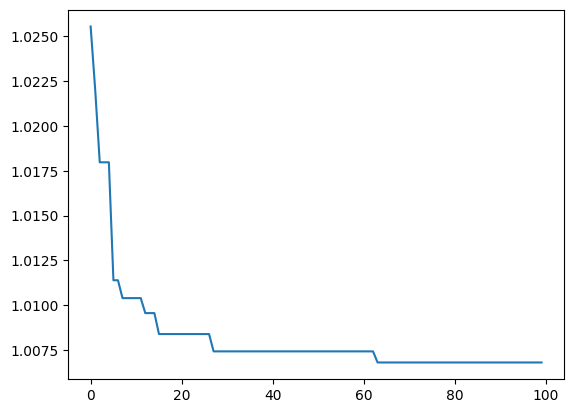

In [118]:
plt.plot(ga_model.history.list_current_best_fit)

In [125]:
from sko.GA import GA
import xgboost
def f(params):
    model = xgboost.XGBRegressor(min_child_weight = int(params[0]), eta = params[1], n_estimators = int(params[2]), colsample_bytree = params[3])
    model.fit(x_train, y_train)
    rmse_test = mean_squared_error(y_test, model.predict(x_test)) ** 0.5
    print(rmse_test)
    return rmse_test
    
ga = GA(func=f, n_dim = 5, lb = [1, 0, 10, 0, 0.5], ub = [10, 1, 500, 1, 1], max_iter=100, size_pop=10)
ga_ret = ga.run()

1.2560089204105902
1.2450866792216835
1.0530225699351916
1.0491180213082991
1.185505953027257
1.443610212621676
1.1667808034932718
1.0150611341696278
1.2681321673749977
1.2862930176837835
1.0680254023959392
1.0369484298509495
1.1185038870254478
1.0530225699351916
1.029612040027387
1.0170525569126918
1.0105044926583173
1.1292189833229789
1.0530225699351916
1.0314407988720657
1.0185967045402582
1.0105044926583173
1.0105044926583173
1.0321578869471124
1.0105044926583173
1.0111648097961419
1.0327508220772783
1.0213163974341788
1.0102894290902136
1.0105044926583173
1.0105044926583173
1.0111953193403067
1.0105044926583173
1.0173013479936874
1.0227939858538215
1.0102894290902136
1.0150611341696278
1.0105044926583173
1.015061434769968
1.0105044926583173
1.0105044926583173
1.0102894290902136
1.0105044926583173
1.0105044926583173
1.0209582922801885
1.0173013479936874
1.0150611341696278
1.0105044926583173
1.0150611341696278
1.0111953193403067
1.0105044926583173
1.0105044926583173
1.01028942909021

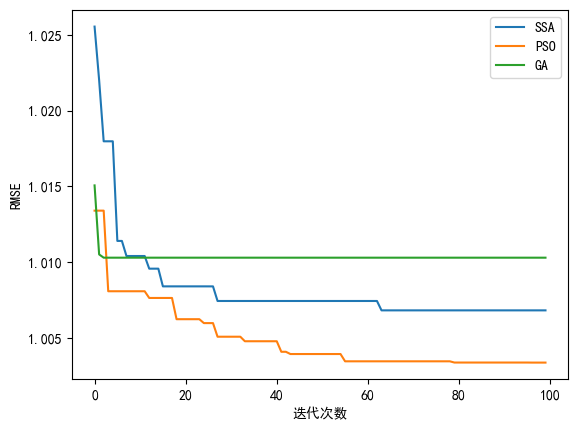

In [135]:
plt.rc('font', family = 'SimHei', size = 10)
plt.rc('axes', unicode_minus = False)
pd.DataFrame({'SSA':ga_model.history.list_current_best_fit, 'PSO':pso_ret.gbest_y_hist, 'GA':ga.generation_best_Y}).plot()
plt.ylabel('RMSE')
plt.xlabel('迭代次数')
plt.savefig('ret.png', dpi = 500)

In [136]:
pso_ret.gbest_x

array([1.00000000e+01, 3.03474388e-02, 1.42583261e+02, 5.39996625e-01,
       7.84115511e-01])